In [22]:
with open("datadaños.txt") as file_object:
    daños = file_object.read()
    print(daños)

    dañosb=daños.split(sep='\n')
    print(dañosb)

31/01/1890
30/05/1866
XX/XX/0616
XX/XX/179X
XX/XX/1837
11-12/10/1761
13/11/1835
XX/11/1879
11/08/1887
25/10/1887
XX/03/1892
10/02/1896
17/11/1896
23/08/1900
06/08/1905
27/02/1914
XX/11/1929
09/06/1931
09/07/1931
XX/12/1932
04/04/1095
11/06/1933
22/02/1934
22/04/1934
31/01/1914
11/09/1921
13/08/1922
24/06/1924
24/08/1925
17/08/1928
21/02/1953
21/09/1912
18/07/1910
05/02/1901
12/02/1908
16/06/1859
XX/XX/1859
15/11/1859
30/11/1954
20/10/1866
26/10/1869
17/02/1934
13/10/1950
09/11/1871
Â¿13/11/1872?
23/11/1877
09/04/1879
10/05/1879
29/06/1880
01/08/1881
30/07/1881
21/09/1881
09/03/1882
06/09/1885
05/05/1886
27/06/1886
13/09/1886
08/12/1886
15/11/1887
14/07/1888
18/12/1890
02/09/1891
02/12/1896
16/11/1901
14/08/1903
12/08/1904
27/08/1913
06/12/1907
12/02/1908
XX/03/1892
30/06/1908
18/12/1890
23/08/1900
24/08/1925
24/11/2002
06/09/1885
08/11/1982
16/11/1901
25/07/1922
23/11/1877
1/06/939
18/07/1910
XX/11/1929

['31/01/1890', '30/05/1866', 'XX/XX/0616', 'XX/XX/179X', 'XX/XX/1837', '11-12/10/1

In [23]:
def detect(date):
    a = date.split('/')
    if len(a[0])==1:
        a[0]='0'+a[0]
    if len(a[1])==1:
        a[0]='0'+a[1]
    
    ok0=len(a[0])==2 and len(a[1])==2 and len(a[2])==4
    ok1=not a[0] == 'XX' 
    ok2=not a[1] == 'XX'
    ok3=not a[0] == '0X'
    ok=ok0*ok1*ok2*ok3
    
    if ok==1:
        newdate=a[2]+'/'+a[1]+'/'+a[0]
        return newdate
    else:
        print('mala fecha', a[0], a[1], a[2])

In [24]:
daños1=dañosb[0:83]
daños1
daños1ok=list(map(detect,daños1))

mala fecha XX XX 0616
mala fecha XX XX 179X
mala fecha XX XX 1837
mala fecha 11-12 10 1761
mala fecha XX 11 1879
mala fecha XX 03 1892
mala fecha XX 11 1929
mala fecha XX 12 1932
mala fecha XX XX 1859
mala fecha Â¿13 11 1872?
mala fecha XX 03 1892
mala fecha 01 06 939
mala fecha XX 11 1929


In [25]:
#Eliminamos valores 'None' de la lista para poder utilizar la función de conversion a longitud solar
res = []
for val in daños1ok:
    if val != None:
        res.append(val)
print ("List after removal of None values : " + str(res))

List after removal of None values : ['1890/01/31', '1866/05/30', '1835/11/13', '1887/08/11', '1887/10/25', '1896/02/10', '1896/11/17', '1900/08/23', '1905/08/06', '1914/02/27', '1931/06/09', '1931/07/09', '1095/04/04', '1933/06/11', '1934/02/22', '1934/04/22', '1914/01/31', '1921/09/11', '1922/08/13', '1924/06/24', '1925/08/24', '1928/08/17', '1953/02/21', '1912/09/21', '1910/07/18', '1901/02/05', '1908/02/12', '1859/06/16', '1859/11/15', '1954/11/30', '1866/10/20', '1869/10/26', '1934/02/17', '1950/10/13', '1871/11/09', '1877/11/23', '1879/04/09', '1879/05/10', '1880/06/29', '1881/08/01', '1881/07/30', '1881/09/21', '1882/03/09', '1885/09/06', '1886/05/05', '1886/06/27', '1886/09/13', '1886/12/08', '1887/11/15', '1888/07/14', '1890/12/18', '1891/09/02', '1896/12/02', '1901/11/16', '1903/08/14', '1904/08/12', '1913/08/27', '1907/12/06', '1908/02/12', '1908/06/30', '1890/12/18', '1900/08/23', '1925/08/24', '2002/11/24', '1885/09/06', '1982/11/08', '1901/11/16', '1922/07/25', '1877/11/23

In [26]:
elementos_rep(res)

['1900/08/23',
 '1925/08/24',
 '1910/07/18',
 '1908/02/12',
 '1877/11/23',
 '1885/09/06',
 '1890/12/18',
 '1901/11/16']

In [27]:
from collections import Counter
#La función set elimina los elementos duplicados
def elem_unicos(lista):
    #Creamos un conjunto con los elementos únicos de la lista
    elementos_unicos = set(lista)
    #Retornamos una lista con los elementos únicos
    return list(elementos_unicos)

In [28]:
dañosSolarL=elem_unicos(res)

In [29]:
import ephem as ep #Ephemerides
import numpy as np 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt 
import argparse
from datetime import datetime

parser = argparse.ArgumentParser()
parser.add_argument("date", type=str, help="Date on day/month/year")
args, known = parser.parse_known_args()
date=args.date

def datetoSolarL(date): # fechas --> 'long solar' medida en la ecliptica
    s =ep.Sun()         
    s.compute(date)     #Ejecutamos la función s para calcular las efemerides en una fecha concreta
    ecl = ep.Ecliptic(s) #Transformamos las coordenadas en coordenadas eclipticas (ascensión_recta-declinación)
    ecl.lon              #Nos da la longitud ecliptica
    #print ecl.lon
    solarL=(ecl.lon/np.pi)*180 #Pasamos de radianes a grados.
    return solarL

In [30]:
dañosSolarL=list(map(datetoSolarL,res))
x0=min(dañosSolarL)
x1=max(dañosSolarL)

In [31]:
#Para encontrar elementos repetidos en la lista de datos
from collections import Counter

def elementos_rep(lista):
    contador = Counter(lista)
    #creamos una lista con los elementos repetidos
    elementos_repetidos = [elemento for elemento, count in contador.items() if count > 1]
    #Retornamos la lista con los elementos repetidos
    return elementos_repetidos

In [32]:
ran=x1-x0

Text(0, 0.5, 'Frequency')

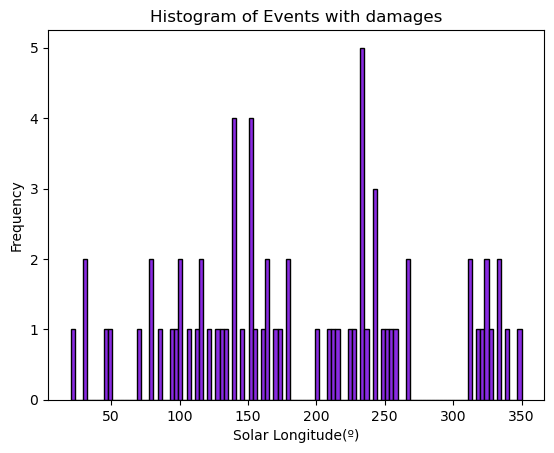

In [33]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(dañosSolarL, color = 'blueviolet', edgecolor = 'black',
         bins = int(ran/3))
# Add labels
plt.title('Histogram of Events with damages')
plt.xlabel('Solar Longitude(º)')
plt.ylabel('Frequency')

In [34]:
def detect2(date):
    a = date.split('/')
    if len(a[0])==1:
        a[0]='0'+a[0]
    if len(a[1])==1:
        a[0]='0'+a[1]
    
    ok0=len(a[0])==2 and len(a[1])==2 and len(a[2])==4
    ok1=not a[0] == 'XX' 
    ok2=not a[1] == 'XX'
    ok3=not a[0] == '0X'
    ok=ok0*ok1*ok2*ok3
    
    if ok==1:
        if a[2]>'1807' and a[2]<'2007': #Restringimos a un periodo de 200 años
            newdate=a[2]+'/'+a[1]+'/'+a[0]
            return newdate
    else:
        print('mala fecha', a[0], a[1], a[2])

In [35]:
daños1=dañosb[0:83]
daños1ok200=list(map(detect2,daños1))

mala fecha XX XX 0616
mala fecha XX XX 179X
mala fecha XX XX 1837
mala fecha 11-12 10 1761
mala fecha XX 11 1879
mala fecha XX 03 1892
mala fecha XX 11 1929
mala fecha XX 12 1932
mala fecha XX XX 1859
mala fecha Â¿13 11 1872?
mala fecha XX 03 1892
mala fecha 01 06 939
mala fecha XX 11 1929


In [36]:
#Eliminamos valores 'None' de la lista para poder utilizar la función de conversion a longitud solar
res200= []
for val in daños1ok200:
    if val != None:
        res200.append(val)
print ("List after removal of None values : " + str(res200))

List after removal of None values : ['1890/01/31', '1866/05/30', '1835/11/13', '1887/08/11', '1887/10/25', '1896/02/10', '1896/11/17', '1900/08/23', '1905/08/06', '1914/02/27', '1931/06/09', '1931/07/09', '1933/06/11', '1934/02/22', '1934/04/22', '1914/01/31', '1921/09/11', '1922/08/13', '1924/06/24', '1925/08/24', '1928/08/17', '1953/02/21', '1912/09/21', '1910/07/18', '1901/02/05', '1908/02/12', '1859/06/16', '1859/11/15', '1954/11/30', '1866/10/20', '1869/10/26', '1934/02/17', '1950/10/13', '1871/11/09', '1877/11/23', '1879/04/09', '1879/05/10', '1880/06/29', '1881/08/01', '1881/07/30', '1881/09/21', '1882/03/09', '1885/09/06', '1886/05/05', '1886/06/27', '1886/09/13', '1886/12/08', '1887/11/15', '1888/07/14', '1890/12/18', '1891/09/02', '1896/12/02', '1901/11/16', '1903/08/14', '1904/08/12', '1913/08/27', '1907/12/06', '1908/02/12', '1908/06/30', '1890/12/18', '1900/08/23', '1925/08/24', '2002/11/24', '1885/09/06', '1982/11/08', '1901/11/16', '1922/07/25', '1877/11/23', '1910/07/18

In [47]:
elementos_rep(res200)

['1900/08/23',
 '1925/08/24',
 '1910/07/18',
 '1908/02/12',
 '1877/11/23',
 '1885/09/06',
 '1890/12/18',
 '1901/11/16']

In [53]:
dañosSolarL200NR=elem_unicos(res200)

In [54]:
dañosSolarL200=list(map(datetoSolarL,dañosSolarL200NR))
x0200=min(dañosSolarL200)
x1200=max(dañosSolarL200)
ran=x1200-x0200

In [56]:
len(dañosSolarL200)

61

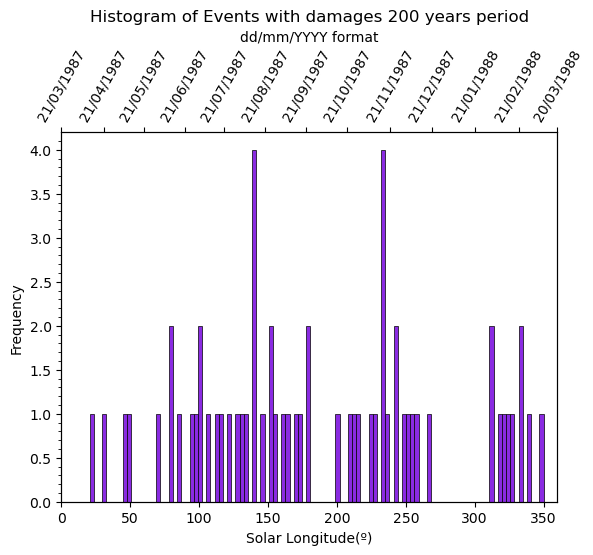

In [57]:
#Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import ephem as ep
#matplotlib histogram
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.hist(dañosSolarL200, bins=int(ran/3),
        linewidth=0.5, color='blueviolet', edgecolor="black")
plt.title('Histogram of Events with damages 200 years period')
plt.xlabel('Solar Longitude(º)')
plt.ylabel('Frequency')
ax2 = ax.twiny()
labels=['21/03/1987', '21/04/1987', '21/05/1987', '21/06/1987', '21/07/1987', '21/08/1987', '21/09/1987', '21/10/1987', '21/11/1987', '21/12/1987', '21/01/1988', '21/02/1988', '20/03/1988' ] 
coordenadas=[0.02529, 30.5519, 59.61486, 89.29932, 117.90791 ,147.60232, 177.65991,207.23129, 238.30222,  268.74034, 300.32445, 331.74296, 359.77043]
ax2.set_xticks(coordenadas)
ax2.set_xticklabels(labels, rotation=60)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax.fmt_xdata = DateFormatter('%m-%d')
ax2.set_xlabel('Over 1 year[1987]')
ax2.set_xlabel('dd/mm/YYYY format')
plt.show()